In [1]:
import pandas as pd
from ensemble_boxes import *
import numpy as np
import mmcv
import cv2
import pyshine as ps
import matplotlib.pyplot as plt 


/opt/conda/envs/myenv1/lib/python3.7/site-packages/mmcv/__init__.py:21: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  'On January 1, 2023, MMCV will release v2.0.0, in which it will remove '


Warning! No module named 'sounddevice'
Warning! No module named 'keras'


In [2]:

def visualize_bbox(submission_file_path,image_id):

    classes = ("General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing")

    # load csv files
    submission_files = [submission_file_path]
    submission_df = [pd.read_csv(file) for file in submission_files]

    image_ids = submission_df[0]['image_id'].tolist()

    while len(str(image_id)) != 4:
        image_id = '0'+ str(image_id)

    prediction_string = ''
    boxes_list = []
    scores_list = []
    labels_list = []

    #  각 submission file 별로 prediction box좌표 불러오기
    for df in submission_df:
        
        predict_string = df[df['image_id'] == f'test/{image_id}.jpg']['PredictionString'].tolist()[0]
        predict_list = str(predict_string).split()
        
        if len(predict_list)==0 or len(predict_list)==1:
            continue
            
        predict_list = np.reshape(predict_list, (-1, 6))
        box_list = []
        
        for box in predict_list[:, 2:6].tolist():
            box[0] = float(box[0]) 
            box[1] = float(box[1])
            box[2] = float(box[2])
            box[3] = float(box[3])
            box_list.append(box)
        
        boxes_list.append(box_list)
        scores_list.append(list(map(float, predict_list[:, 1].tolist())))
        labels_list.append(list(map(int, predict_list[:, 0].tolist())))

    boxes_list = np.array(boxes_list)
    
    img_pred = mmcv.imread(f'/opt/ml/dataset/test/{image_id}.jpg')

    for i in range(len(boxes_list[0])):

        # change bbox type -> np.int32
        bbox = boxes_list[0][i].astype(np.int32)

        # draw GT bbox
        cv2.rectangle(img_pred, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 0, 255), 2)

        # put text
        img_pred = cv2.putText(img_pred, classes[labels_list[0][i]], (bbox[0]+ np.int(5),bbox[1]+np.int(25)), cv2.FONT_ITALIC, 0.8, (0,0,0),2)
    
    img = cv2.cvtColor(img_pred,cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8,10))
    plt.imshow(img)

/opt/conda/envs/myenv1/lib/python3.7/site-packages/ipykernel_launcher.py:56: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


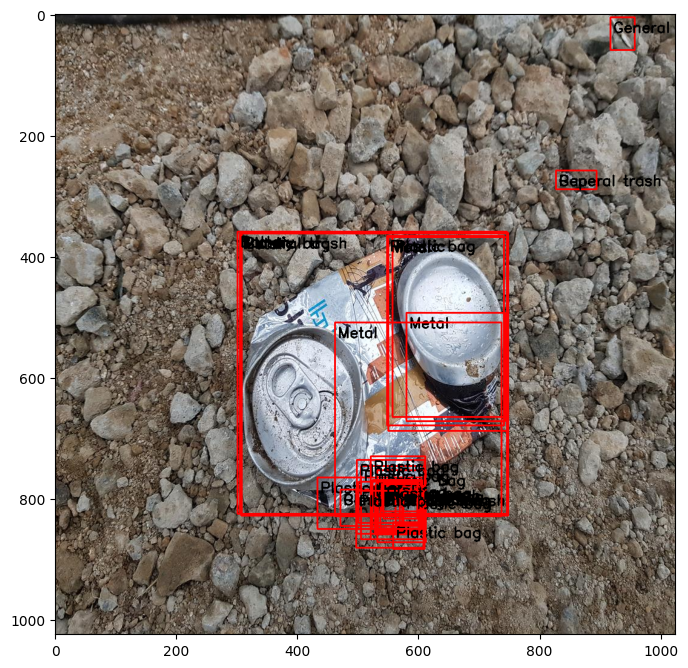

In [4]:
 visualize_bbox('/opt/ml/sample_submission/fold_wbf_iou_08.csv',23)